## 1 wine_reviews
对wine_reviews数据集进行关联规则分析

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from efficient_apriori import apriori
import warnings
from sklearn.exceptions import DataConversionWarning

In [3]:
# 加载数据
wine_reviews= pd.read_csv("./wine-reviews/winemag-data-130k-v2.csv", index_col = 0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 1.1处理数据集

In [37]:
# 由于description是品酒师对酒的形容，与关联规则挖掘关系不大，删除该列
# wine_reviews.drop(columns=["description"],inplace=True)
wine_reviews=wine_reviews.dropna(how='any')
# 转为list类型
wine_data=np.array(wine_reviews)
wine_list=wine_data.tolist()

### 1.2频繁模式及关联规则，并对关联规则进行评价

In [50]:
# 挖掘频繁项集和频繁规则
# 最小支持度设置为0.2 置信度为0.7
itemsets, rules = apriori(wine_list, min_support=0.2,  min_confidence=0.6)
for item in itemsets:
    print(item,"项集")
    print(itemsets[item])
# 输出关联规则并使用lift及conviction进行评价
# conviction为对于规则X -> Y ， P(not Y) / P(not Y | X).
print("关联规则：")
for rule in rules:
    print(rule)

1 项集
{('@paulgwine\xa0',): 5989, ('Pinot Noir',): 4807, ('US',): 22387, ('Paul Gregutt',): 5989, ('Virginie Boone',): 6422, ('California',): 12900, ('@vboone',): 6422, ('@mattkettmann',): 4479, ('Central Coast',): 4689, ('Matt Kettmann',): 4479, ('Columbia Valley',): 5532, ('Washington',): 5845}
2 项集
{('@paulgwine\xa0', 'Paul Gregutt'): 5989, ('@paulgwine\xa0', 'US'): 5989, ('Paul Gregutt', 'US'): 5989, ('Pinot Noir', 'US'): 4807, ('@vboone', 'California'): 6422, ('@vboone', 'US'): 6422, ('@vboone', 'Virginie Boone'): 6422, ('California', 'US'): 12900, ('California', 'Virginie Boone'): 6422, ('US', 'Virginie Boone'): 6422, ('@mattkettmann', 'California'): 4479, ('@mattkettmann', 'Matt Kettmann'): 4479, ('@mattkettmann', 'US'): 4479, ('California', 'Central Coast'): 4689, ('California', 'Matt Kettmann'): 4479, ('Central Coast', 'US'): 4689, ('Matt Kettmann', 'US'): 4479, ('Columbia Valley', 'US'): 5532, ('Columbia Valley', 'Washington'): 5532, ('US', 'Washington'): 5845}
3 项集
{('@paulgw

### 1.3挖掘结果分析及可视化表示

### 通过分析频繁模式和关联规则，可以发现，葡萄酒的品尝者和其推特名、葡萄酒的产地有比较强的相关性

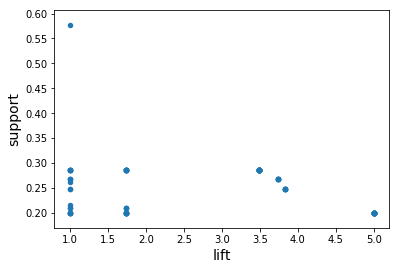

In [60]:
x_lift=[]
y_supp=[]
x_conf=[]
y_conv=[]
for rule in rules:
    x_lift.append(rule.lift)
    y_supp.append(rule.support)
    x_conf.append(rule.confidence)
    y_conv.append(rule.conviction)
    
plt.scatter(x_lift,y_supp,s=20)
#设置标题并加上轴标签
plt.xlabel("lift",fontsize=14)
plt.ylabel("support",fontsize=14)
plt.show()

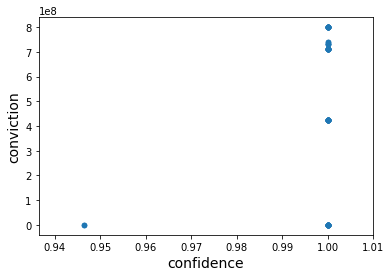

In [61]:
plt.scatter(x_conf,y_conv,s=20)
#设置标题并加上轴标签
plt.xlabel("confidence",fontsize=14)
plt.ylabel("conviction",fontsize=14)
plt.show()

## 2 oakland-crime-statistics
对oakland-crime-statistics数据集做关联规则分析

### 2.1数据集处理

In [72]:
# 加载数据
crime_11 = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2011.csv", index_col = 0)
crime_12 = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2012.csv", index_col = 0)
crime_13 = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2013.csv", index_col = 0)
crime_14 = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2014.csv", index_col = 0)
crime_15 = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2015.csv", index_col = 0)
crime_16 = pd.read_csv("./oakland-crime-statistics-2011-to-2016/records-for-2016.csv", index_col = 0)
crime_11.head()

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [73]:
# 缺失值处理
crime_11=crime_11.dropna(how='any')
crime_12=crime_11.dropna(how='any')
crime_13=crime_11.dropna(how='any')
crime_14=crime_11.dropna(how='any')
crime_15=crime_11.dropna(how='any')
crime_16=crime_11.dropna(how='any')
# 转为list类型
crime_11_data=np.array(crime_11)
crime_11_list=crime_11_data.tolist()
crime_12_data=np.array(crime_12)
crime_12_list=crime_12_data.tolist()
crime_13_data=np.array(crime_13)
crime_13_list=crime_13_data.tolist()
crime_14_data=np.array(crime_14)
crime_14_list=crime_14_data.tolist()
crime_15_data=np.array(crime_15)
crime_15_list=crime_15_data.tolist()
crime_16_data=np.array(crime_16)
crime_16_list=crime_16_data.tolist()

### 2.2频繁模式及关联规则，并对关联规则进行评价

In [82]:
# 挖掘频繁项集和频繁规则
# 最小支持度设置为0.2 置信度为0.7
files=[crime_11_list,crime_12_list,crime_13_list,crime_14_list,crime_15_list,crime_16_list]
i=2011
all_rules=[]
for file in files:
    itemsets, rules = apriori(file, min_support=0.2,  min_confidence=0.6)
    print(i,":")
    for item in itemsets:
        print(item,"项集")
        print(itemsets[item])
    # 输出关联规则并使用lift及conviction进行评价
    # conviction为对于规则X -> Y ， P(not Y) / P(not Y | X).
    print("关联规则：")
    for rule in rules:
        print(rule)
    all_rules.append(rules)
    i+=1

2011 :
1 项集
{(1.0,): 100264, (2.0,): 156386}
2 项集
{(1.0, 2.0): 77880}
关联规则：
{1.0} -> {2.0} (conf: 0.777, supp: 0.436, lift: 0.888, conv: 0.561)
2012 :
1 项集
{(1.0,): 100264, (2.0,): 156386}
2 项集
{(1.0, 2.0): 77880}
关联规则：
{1.0} -> {2.0} (conf: 0.777, supp: 0.436, lift: 0.888, conv: 0.561)
2013 :
1 项集
{(1.0,): 100264, (2.0,): 156386}
2 项集
{(1.0, 2.0): 77880}
关联规则：
{1.0} -> {2.0} (conf: 0.777, supp: 0.436, lift: 0.888, conv: 0.561)
2014 :
1 项集
{(1.0,): 100264, (2.0,): 156386}
2 项集
{(1.0, 2.0): 77880}
关联规则：
{1.0} -> {2.0} (conf: 0.777, supp: 0.436, lift: 0.888, conv: 0.561)
2015 :
1 项集
{(1.0,): 100264, (2.0,): 156386}
2 项集
{(1.0, 2.0): 77880}
关联规则：
{1.0} -> {2.0} (conf: 0.777, supp: 0.436, lift: 0.888, conv: 0.561)
2016 :
1 项集
{(1.0,): 100264, (2.0,): 156386}
2 项集
{(1.0, 2.0): 77880}
关联规则：
{1.0} -> {2.0} (conf: 0.777, supp: 0.436, lift: 0.888, conv: 0.561)


### 2.5分析结果并可视化

#### 通过频繁项集及关联规则可以发现，area_id和priority有很强的相关性，area_id为1的地区在这六年内priority一直为2

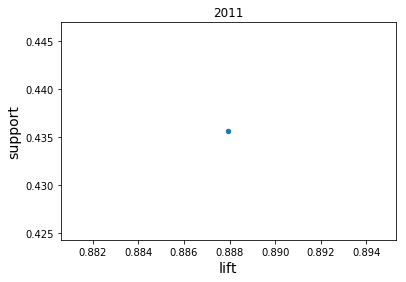

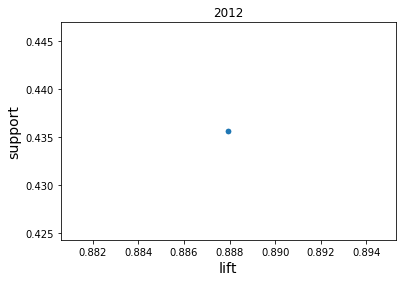

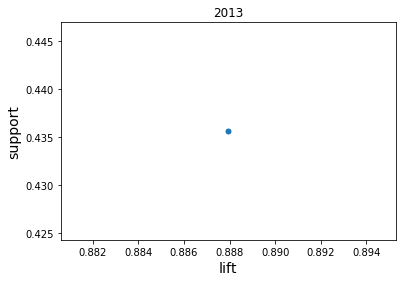

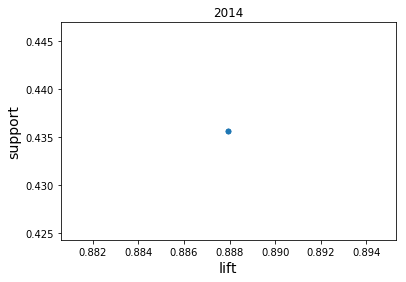

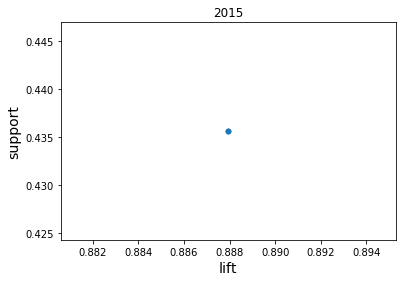

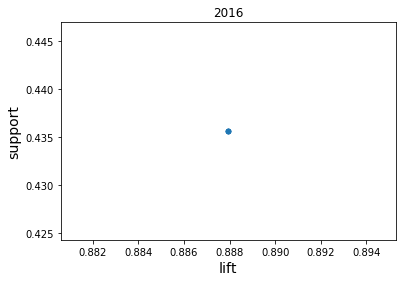

In [80]:
x_lift=[]
y_supp=[]
i=2011
for rules in all_rules:
    for rule in rules:
        x_lift.append(rule.lift)
        y_supp.append(rule.support)
        plt.scatter(x_lift,y_supp,s=20)
        #设置标题并加上轴标签
        plt.title(i)
        plt.xlabel("lift",fontsize=14)
        plt.ylabel("support",fontsize=14)
        plt.show()
    i+=1